In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import time
from numpy import linalg as LA

In [2]:
a = 1.5
b = 1
r = 0.3
mu = 0.5
sigma = 0.3
rho01 = -0.5
rho02 = 0.1
rho12 = -0.25
beta = 0.5
theta = 0.8
eta = 2
x = 20
y = 20
m = 1
T = 2
n_step = 4
m = 1
U = lambda x : -np.exp(-m*x)/m #exponential utility
inc = T/n_step
dt = np.arange(0,T,inc)
print(dt)

[0.  0.5 1.  1.5]


In [3]:
Corr = [[1, rho01, rho02], [rho01, 1, rho12], [rho02, rho12, 1]]
eigval, eigvec = LA.eig(Corr)
print(eigval)
L_T = np.linalg.cholesky(Corr).T

def CorrW(sd,n=10**6):
    W = np.random.normal(loc=0, scale=sd, size=[n,3])
    W_corr = np.dot(W,L_T)
    W0 = W_corr[:,0]
    W1 = W_corr[:,1]
    W2 = W_corr[:,2]
    
    return W0,W1,W2

[1.6032748  0.47577635 0.92094885]


## Case 1 $p = 0$

The following is the analytical optimal policy.
<center>$\pi_t^* = \frac{\mu-r}{m\sigma^2} e^{-r(T-t)} - \frac{\beta\rho_{1,2}}{\sigma}$</center>

In [4]:
p = 0
pi2_opt = [(mu-r)/(2*(1+rho12)*m*sigma**2)*np.exp(-r*(T-time)) for time in dt]
print(pi2_opt)

[0.813054275694854, 0.9446342986989233, 1.0975084750840265, 1.2751229280371226]


In [5]:
policy = np.sort(np.append(np.arange(0.7,1.6,0.1),pi2_opt))
print(policy)

[0.7        0.8        0.81305428 0.9        0.9446343  1.
 1.09750848 1.1        1.2        1.27512293 1.3        1.4
 1.5       ]


In [6]:
V = np.zeros([len(dt),len(policy)])
V2 = np.zeros([len(dt),len(policy)])
#V3 = np.zeros([len(dt),len(policy)])

j = n_step-1 #iterate time
timing = time.time()
opt = np.empty(0)
opt2 = np.empty(0)
#opt3 = np.empty(0)
for start_time in np.flip(dt):
    k = 0 #iterate policy
    for pol in policy:
        policy2 = np.append(pol,opt)
        n_sim = 2000000
        increment = (T-start_time)/10
        t = np.arange(start_time,T,increment)
        #policy3 = [(mu-r)/(2*(1+rho12)*m*sigma**2)*np.exp(-r*(T-time)) for time in t[1:]]
        #policy3 = np.append(pol,policy3)
        policy3 = np.append(pol,pi2_opt[j+1:])
        u = np.zeros(n_sim)
        u2 = np.zeros(n_sim)
        #u3 = np.zeros(n_sim)
        for i in range(n_sim):
            Y = y
            Y2 = y
            Y3 = y
            W0,W1,W2 = CorrW(np.sqrt(increment),n=len(t))
            for l in range(len(t)):
                pi = policy2[(np.floor(l/(len(t))*len(policy2)).astype(int))]
                pi2 = policy3[(np.floor(l/(len(t))*len(policy2)).astype(int))]
                Y = Y  +  (r*Y+pi*(mu-r))*increment  +  pi*sigma*W1[l] + pi*sigma*W2[l]
                Y2 = Y2  +  (r*Y2+pi2*(mu-r))*increment  +  pi2*sigma*W1[l] + pi2*sigma*W2[l]
                #Y3 = Y3  +  (r*Y3+pol*(mu-r))*increment  +  pol*sigma*W1[l] + pol*sigma*W2[l]
            u[i] = U(Y)
            u2[i] = U(Y2)
            #u3[i] = U(Y3)
        V[j,k] = np.mean(u)
        V2[j,k] = np.mean(u2)
        #V3[j,k] = np.mean(u3)
        k = k+1 #iterate policy
    opt = np.append(policy[np.argmax(V[j,:])],opt)
    opt2 = np.append(policy[np.argmax(V2[j,:])],opt2)
    #opt3 = np.append(policy[np.argmax(V3[j,:])],opt3)
    j = j-1 #iterate time
    print(j+1,end=",")    
print("--- %s hours ---" % ((time.time() - timing)/60/60))

case1 = pi2_opt
case1_1 = opt
case1_2 = opt2
#case1_3 = opt3

3,2,1,0,--- 2.187282086743249 hours ---


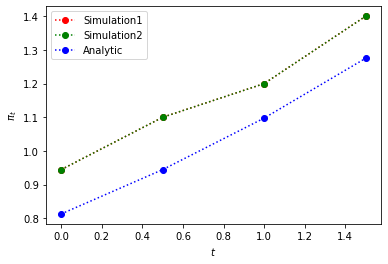

Analytical [0.813054275694854, 0.9446342986989233, 1.0975084750840265, 1.2751229280371226]
Simulation [0.9446343 1.1       1.2       1.4      ]
Simulation2 [0.9446343 1.1       1.2       1.4      ]


In [7]:
plt.plot(dt,case1_1, 'o:r',label="Simulation1")
plt.plot(dt,case1_2, 'o:g',label="Simulation2")
#plt.plot(dt,case1_3, 'o:c',label="Simulation3")
plt.plot(dt,case1, 'o:b',label="Analytic")
plt.ylabel(r"$\pi_t$")
plt.xlabel(r"$t$")
plt.legend()
#plt.savefig('case1.png')

plt.show()


print("Analytical",case1)
print("Simulation",case1_1)
print("Simulation2",case1_2)
#print("Simulation3",case1_3)

## Case 2 $p \in (0,1)$

The following is the analytical optimal policy.
<center>$\pi_t^* = \frac{\mu-r}{m\sigma^2} e^{-r(T-t)} - \frac{b\rho_{1,2}}{\sigma}p  - \frac{\beta\rho_{1,2}}{\sigma}$</center>

In [8]:
p = 0.5
pi2_opt = [(mu-r)/(2*(1+rho12)*m*sigma**2)*np.exp(-r*(T-time)) - p*b*(rho01+rho02)/2/(1+rho12)/sigma for time in dt]
print(pi2_opt)

[1.2574987201392984, 1.3890787431433678, 1.541952919528471, 1.719567372481567]


In [9]:
policy = np.sort(np.append(np.arange(1.1,2,0.1),pi2_opt))
print(policy)

[1.1        1.2        1.25749872 1.3        1.38907874 1.4
 1.5        1.54195292 1.6        1.7        1.71956737 1.8
 1.9       ]


In [10]:
V = np.zeros([len(dt),len(policy)])
V2 = np.zeros([len(dt),len(policy)])
#V3 = np.zeros([len(dt),len(policy)])

j = n_step-1 #iterate time
timing = time.time()
opt = np.empty(0)
opt2 = np.empty(0)
#opt3 = np.empty(0)
for start_time in np.flip(dt):
    k = 0 #iterate policy
    for pol in policy:
        policy2 = np.append(pol,opt)
        n_sim = 2000000
        increment = (T-start_time)/10
        t = np.arange(start_time,T,increment)
        #policy3 = [(mu-r)/(2*(1+rho12)*m*sigma**2)*np.exp(-r*(T-time)) - p*b*(rho01+rho02)/2/(1+rho12)/sigma for time in t[1:]]
        #policy3 = np.append(pol,policy3)
        policy3 = np.append(pol,pi2_opt[j+1:])
        u = np.zeros(n_sim)
        u2 = np.zeros(n_sim)
        #u3 = np.zeros(n_sim)
        for i in range(n_sim):
            Y = y
            Y2 = y
            #Y3 = y
            W0,W1,W2 = CorrW(np.sqrt(increment),n=len(t))
            for l in range(len(t)):
                pi = policy2[(np.floor(l/len(t)*len(policy2)).astype(int))]
                pi2 = policy3[(np.floor(l/len(t)*len(policy3)).astype(int))]
                Y = Y  +  (r*Y+pi*(mu-r)+eta*p*a)*increment  +  b*p*W0[l] + pi*sigma*W1[l]  + pi*sigma*W2[l]
                Y2 = Y2  +  (r*Y2+pi2*(mu-r)+eta*p*a)*increment  +  b*p*W0[l] +  pi2*sigma*W1[l] + pi2*sigma*W2[l]
                #Y3 = Y3  +  (r*Y3+pol*(mu-r)+eta*p*a)*increment  +  b*p*W0[l] + pol*sigma*W1[l]  + pol*sigma*W2[l]
            u[i] = U(Y)
            u2[i] = U(Y2)
            #u3[i] = U(Y3)
        V[j,k] = np.mean(u)
        V2[j,k] = np.mean(u2)
        #V3[j,k] = np.mean(u3)
        k = k+1 #iterate policy
    opt = np.append(policy[np.argmax(V[j,:])],opt)
    opt2 = np.append(policy[np.argmax(V2[j,:])],opt2)
    #opt3 = np.append(policy[np.argmax(V3[j,:])],opt3)
    j = j-1 #iterate time
    print(j+1,end=",")    
print("--- %s hours ---" % ((time.time() - timing)/60/60))  

case2 = pi2_opt
case2_1 = opt
case2_2 = opt2
#case2_3 = opt3

3,2,1,0,--- 2.033182931608624 hours ---


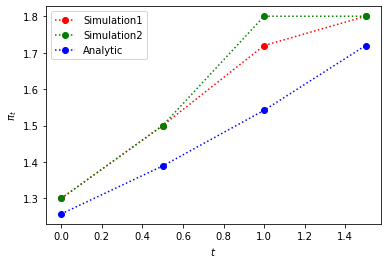

Analytical [1.2574987201392984, 1.3890787431433678, 1.541952919528471, 1.719567372481567]
Simulation [1.3        1.5        1.71956737 1.8       ]
Simulation2 [1.3 1.5 1.8 1.8]


In [11]:
plt.plot(dt,case2_1, 'o:r',label="Simulation1")
plt.plot(dt,case2_2, 'o:g',label="Simulation2")
#plt.plot(dt,case2_3, 'o:c',label="Simulation3")
plt.plot(dt,case2, 'o:b',label="Analytic")
plt.ylabel(r"$\pi_t$")
plt.xlabel(r"$t$")
plt.legend()
#plt.savefig('case2.png')
plt.show()


print("Analytical",case2)
print("Simulation",case2_1)
print("Simulation2",case2_2)
#print("Simulation3",case2_3)

## Case 3 $p = 1$

The following is the analytical optimal policy.
<center>$\pi_t^* = \frac{\mu-r}{m\sigma^2} e^{-r(T-t)} - \frac{b\rho_{0,1}}{\sigma}  - \frac{\beta\rho_{1,2}}{\sigma}$</center>

In [12]:
p = 1
pi2_opt = [(mu-r)/(2*(1+rho12)*m*sigma**2)*np.exp(-r*(T-time)) - p*b*(rho01+rho02)/2/(1+rho12)/sigma for time in dt]
print(pi2_opt)

[1.701943164583743, 1.8335231875878124, 1.9863973639729156, 2.1640118169260116]


In [13]:
policy = np.sort(np.append(np.arange(1.5,2.8,0.1),pi2_opt))
print(policy)

[1.5        1.6        1.7        1.70194316 1.8        1.83352319
 1.9        1.98639736 2.         2.1        2.16401182 2.2
 2.3        2.4        2.5        2.6        2.7       ]


In [14]:
V = np.zeros([len(dt),len(policy)])
V2 = np.zeros([len(dt),len(policy)])
#V3 = np.zeros([len(dt),len(policy)])

j = n_step-1 #iterate time
timing = time.time()
opt = np.empty(0)
opt2 = np.empty(0)
#opt3 = np.empty(0)
for start_time in np.flip(dt):
    k = 0 #iterate policy
    for pol in policy:
        policy2 = np.append(pol,opt)
        n_sim = 2500000
        increment = (T-start_time)/10
        t = np.arange(start_time,T,increment)
        #policy3 = [(mu-r)/(2*(1+rho12)*m*sigma**2)*np.exp(-r*(T-time)) - p*b*(rho01+rho02)/2/(1+rho12)/sigma for time in t[1:]]
        #policy3 = np.append(pol,policy3)
        policy3 = np.append(pol,pi2_opt[j+1:])
        u = np.zeros(n_sim)
        u2 = np.zeros(n_sim)
        #u3 = np.zeros(n_sim)
        for i in range(n_sim):
            Y = y
            Y2 = y
            #Y3 = y
            W0,W1,W2 = CorrW(np.sqrt(increment),n=len(t))
            for l in range(len(t)):
                pi = policy2[(np.floor(l/len(t)*len(policy2)).astype(int))]
                pi2 = policy3[(np.floor(l/len(t)*len(policy3)).astype(int))]
                Y = Y  +  (r*Y+pi*(mu-r)+eta*p*a)*increment  +  b*p*W0[l] + pi*sigma*W1[l]  + pi*sigma*W2[l]
                Y2 = Y2  +  (r*Y2+pi2*(mu-r)+eta*p*a)*increment  +  b*p*W0[l] +  pi2*sigma*W1[l] + pi2*sigma*W2[l]
                #Y3 = Y3  +  (r*Y3+pol*(mu-r)+eta*p*a)*increment  +  b*p*W0[l] + pol*sigma*W1[l]  + pol*sigma*W2[l]
            u[i] = U(Y)
            u2[i] = U(Y2)
            #u3[i] = U(Y3)
        V[j,k] = np.mean(u)
        V2[j,k] = np.mean(u2)
        #V3[j,k] = np.mean(u3)
        k = k+1 #iterate policy
    opt = np.append(policy[np.argmax(V[j,:])],opt)
    opt2 = np.append(policy[np.argmax(V2[j,:])],opt2)
    #opt3 = np.append(policy[np.argmax(V3[j,:])],opt3)
    j = j-1 #iterate time
    print(j+1,end=",")    
print("--- %s hours ---" % ((time.time() - timing)/60/60))

case3 = pi2_opt
case3_1 = opt
case3_2 = opt2
#case3_3 = opt3

3,2,1,0,--- 15.073901550504896 hours ---


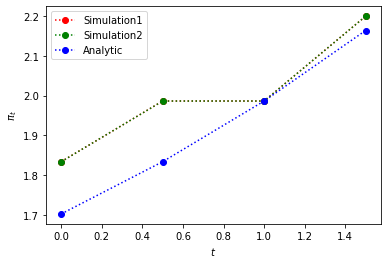

Analytical [1.701943164583743, 1.8335231875878124, 1.9863973639729156, 2.1640118169260116]
Simulation [1.83352319 1.98639736 1.98639736 2.2       ]
Simulation2 [1.83352319 1.98639736 1.98639736 2.2       ]


In [15]:
plt.plot(dt,case3_1, 'o:r',label="Simulation1")
plt.plot(dt,case3_2, 'o:g',label="Simulation2")
#plt.plot(dt,case3_3, 'o:c',label="Simulation3")
plt.plot(dt,case3, 'o:b',label="Analytic")
plt.ylabel(r"$\pi_t$")
plt.xlabel(r"$t$")
plt.legend()
#plt.savefig('case3.png')
plt.show()



print("Analytical",case3)
print("Simulation",case3_1)
print("Simulation2",case3_2)
#print("Simulation3",case3_3)